In [2]:
dataset_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-44/detailed-bidirectional-flow-labels/capture20110812.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-45/detailed-bidirectional-flow-labels/capture20110815.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-46/detailed-bidirectional-flow-labels/capture20110815-2.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-47/detailed-bidirectional-flow-labels/capture20110816.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-48/detailed-bidirectional-flow-labels/capture20110816-2.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-49/detailed-bidirectional-flow-labels/capture20110816-3.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-50/detailed-bidirectional-flow-labels/capture20110817.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-52/detailed-bidirectional-flow-labels/capture20110818-2.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-53/detailed-bidirectional-flow-labels/capture20110819.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-54/detailed-bidirectional-flow-labels/capture20110815-3.binetflow"]

In [3]:
import pandas as pd
from tqdm import tqdm

final_df = pd.DataFrame()
for url in tqdm(dataset_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_data.csv", index=False)
del final_df

100%|██████████| 13/13 [04:47<00:00, 22.10s/it]


In [4]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 58.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/ctu_13_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established


In [2]:
data.shape

(19976700, 15)

In [3]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [4]:
def convertlabel(sample_data):
    if "botnet" in sample_data.lower():
        return 1
    else:
        return 0

data['Label'] = data['Label'].apply(lambda x:convertlabel(x))

In [5]:
data['Label'].value_counts()

,count
Label,
0,19532001
1,444699


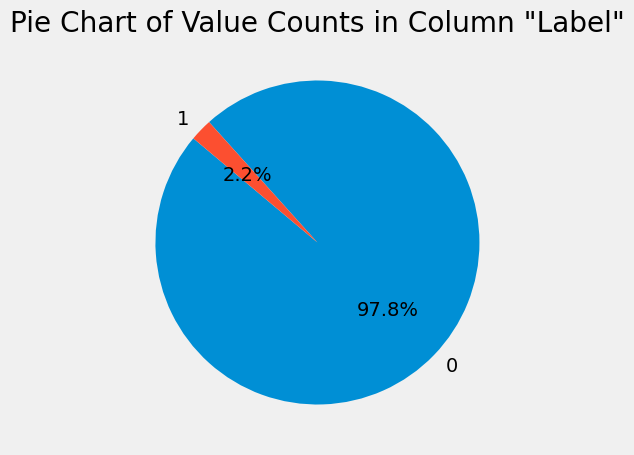

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [7]:
th = 1000
data1 = data[data['Label'] == 0].sample(th)
data2 = data[data['Label'] == 1].sample(th)

data = pd.concat([data1,data2])
data.shape

(2000, 15)

In [8]:
data['Label'].value_counts()

,count
Label,
0,1000
1,1000


In [9]:
data.to_csv('/content/ctu_13_sample_data.csv', index=False)

In [10]:
data = pd.read_csv('/content/ctu_13_sample_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/14 21:21:43.883581,0.000307,udp,147.32.85.34,54995,<->,147.32.80.9,53,CON,0.0,0.0,2,321,84,0
1,2011/08/10 13:03:49.121246,2677.963623,udp,95.43.27.250,44020,<->,147.32.84.229,13363,CON,0.0,0.0,4,268,148,0
2,2011/08/15 18:45:23.896693,0.000372,udp,147.32.85.69,33371,<->,147.32.80.9,53,CON,0.0,0.0,2,218,74,0
3,2011/08/13 03:19:37.879287,0.000145,udp,147.32.84.138,60212,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,0
4,2011/08/15 20:03:31.821902,1.025449,udp,78.106.76.183,25725,<->,147.32.84.229,13363,CON,0.0,0.0,4,1048,928,0


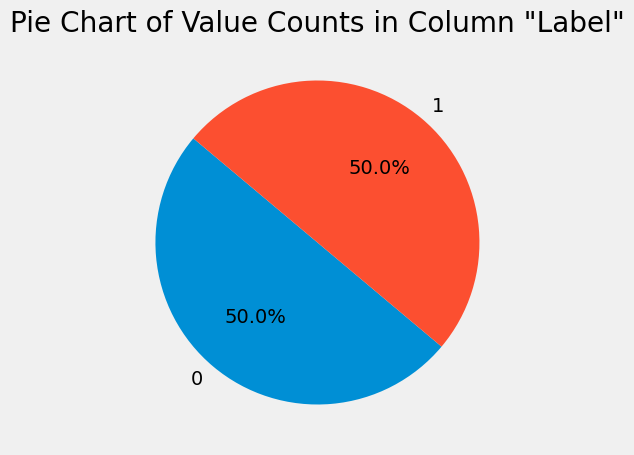

In [11]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [12]:
data.dtypes

,0
StartTime,object
Dur,float64
Proto,object
SrcAddr,object
Sport,object
Dir,object
DstAddr,object
Dport,object
State,object
sTos,float64


In [13]:
data.isna().mean() * 100

,0
StartTime,0.00
Dur,0.00
Proto,0.00
SrcAddr,0.00
Sport,0.80
Dir,0.00
DstAddr,0.00
Dport,13.80
State,0.05
sTos,0.70


In [14]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/14 21:21:43.883581,0.000307,udp,147.32.85.34,54995,<->,147.32.80.9,53,CON,0.0,0.0,2,321,84,0
1,2011/08/10 13:03:49.121246,2677.963623,udp,95.43.27.250,44020,<->,147.32.84.229,13363,CON,0.0,0.0,4,268,148,0
2,2011/08/15 18:45:23.896693,0.000372,udp,147.32.85.69,33371,<->,147.32.80.9,53,CON,0.0,0.0,2,218,74,0
3,2011/08/13 03:19:37.879287,0.000145,udp,147.32.84.138,60212,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,0
4,2011/08/15 20:03:31.821902,1.025449,udp,78.106.76.183,25725,<->,147.32.84.229,13363,CON,0.0,0.0,4,1048,928,0


In [15]:
data = data[pd.to_numeric(data['Sport'], errors='coerce').notnull()]
data['Sport'] = pd.to_numeric(data['Sport'])
data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.118413
State,0.000000
sTos,0.118413


In [16]:
data = data[pd.to_numeric(data['Dport'], errors='coerce').notnull()]
data['Dport'] = pd.to_numeric(data['Dport'])
data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.118554


In [17]:
data = data.fillna(value=0.0)
data.isna().mean() * 100

,0
StartTime,0.0
Dur,0.0
Proto,0.0
SrcAddr,0.0
Sport,0.0
Dir,0.0
DstAddr,0.0
Dport,0.0
State,0.0
sTos,0.0


In [18]:
data.describe()

,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
count,1687.000000,1687.000000,1687.000000,1687.0,1687.0,1687.000000,1.687000e+03,1.687000e+03,1687.000000
mean,166.681281,23980.057499,4768.202727,0.0,0.0,24.148785,4.665910e+03,2.268144e+03,0.424422
std,647.149543,23039.154690,10994.321671,0.0,0.0,637.255669,5.693037e+04,5.543687e+04,0.494402
min,0.000000,80.000000,22.000000,0.0,0.0,1.000000,6.000000e+01,0.000000e+00,0.000000
25%,0.000329,2212.000000,53.000000,0.0,0.0,2.000000,1.935000e+02,7.500000e+01,0.000000
50%,0.056580,13363.000000,53.000000,0.0,0.0,2.000000,2.480000e+02,8.300000e+01,0.000000
75%,4.341210,48430.000000,3163.000000,0.0,0.0,4.000000,4.330000e+02,1.860000e+02,1.000000
max,3596.986084,65348.000000,65520.000000,0.0,0.0,26148.000000,2.231518e+06,2.231518e+06,1.000000


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1687 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StartTime  1687 non-null   object 
 1   Dur        1687 non-null   float64
 2   Proto      1687 non-null   object 
 3   SrcAddr    1687 non-null   object 
 4   Sport      1687 non-null   int64  
 5   Dir        1687 non-null   object 
 6   DstAddr    1687 non-null   object 
 7   Dport      1687 non-null   int64  
 8   State      1687 non-null   object 
 9   sTos       1687 non-null   float64
 10  dTos       1687 non-null   float64
 11  TotPkts    1687 non-null   int64  
 12  TotBytes   1687 non-null   int64  
 13  SrcBytes   1687 non-null   int64  
 14  Label      1687 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 210.9+ KB


In [20]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/14 21:21:43.883581,0.000307,udp,147.32.85.34,54995,<->,147.32.80.9,53,CON,0.0,0.0,2,321,84,0
1,2011/08/10 13:03:49.121246,2677.963623,udp,95.43.27.250,44020,<->,147.32.84.229,13363,CON,0.0,0.0,4,268,148,0
2,2011/08/15 18:45:23.896693,0.000372,udp,147.32.85.69,33371,<->,147.32.80.9,53,CON,0.0,0.0,2,218,74,0
3,2011/08/13 03:19:37.879287,0.000145,udp,147.32.84.138,60212,<->,147.32.80.9,53,CON,0.0,0.0,2,214,81,0
4,2011/08/15 20:03:31.821902,1.025449,udp,78.106.76.183,25725,<->,147.32.84.229,13363,CON,0.0,0.0,4,1048,928,0


In [21]:
data['Proto'].value_counts()

,count
Proto,
udp,1058
tcp,628
rtcp,1


In [22]:
data['Dir'].value_counts()

,count
Dir,
<->,1016
->,668
<?>,2
?>,1


In [23]:
data['State'].value_counts()

,count
State,
CON,1016
S_,271
FSPA_FSPA,151
S_RA,100
INT,43
SRPA_FSPA,26
SRPA_SPA,17
FSA_FSA,11
FSRPA_FSPA,5


In [24]:
data.isna().sum().sum()

0

In [25]:
data.duplicated().sum()

0

In [26]:
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['Hour'] = data['StartTime'].dt.hour
data['Minute'] = data['StartTime'].dt.minute
data['Second'] = data['StartTime'].dt.second
data['DayOfWeek'] = data['StartTime'].dt.dayofweek
data['Day'] = data['StartTime'].dt.day

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1687 entries, 0 to 1998
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StartTime  1687 non-null   datetime64[ns]
 1   Dur        1687 non-null   float64       
 2   Proto      1687 non-null   object        
 3   SrcAddr    1687 non-null   object        
 4   Sport      1687 non-null   int64         
 5   Dir        1687 non-null   object        
 6   DstAddr    1687 non-null   object        
 7   Dport      1687 non-null   int64         
 8   State      1687 non-null   object        
 9   sTos       1687 non-null   float64       
 10  dTos       1687 non-null   float64       
 11  TotPkts    1687 non-null   int64         
 12  TotBytes   1687 non-null   int64         
 13  SrcBytes   1687 non-null   int64         
 14  Label      1687 non-null   int64         
 15  Hour       1687 non-null   int32         
 16  Minute     1687 non-null   int32         
 17  

In [28]:
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']
numerical_columns = [col for col in data.columns if col not in categorical_columns]

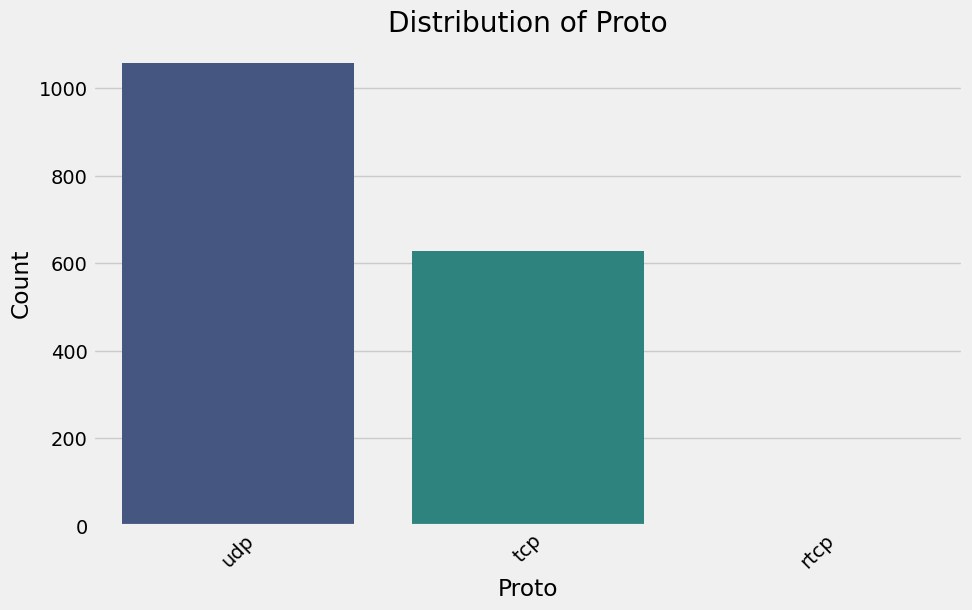

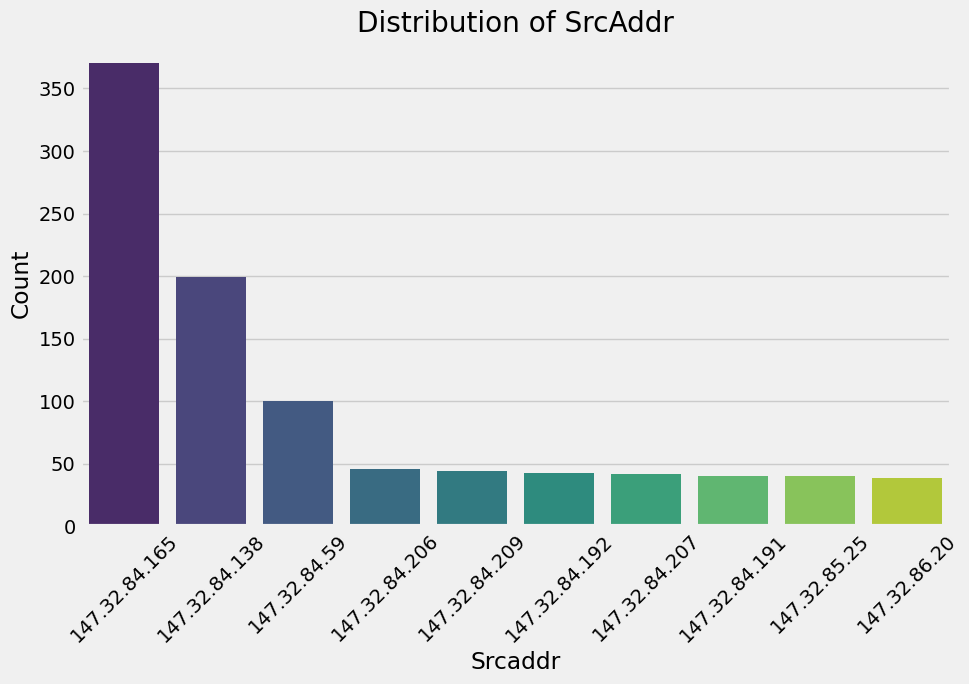

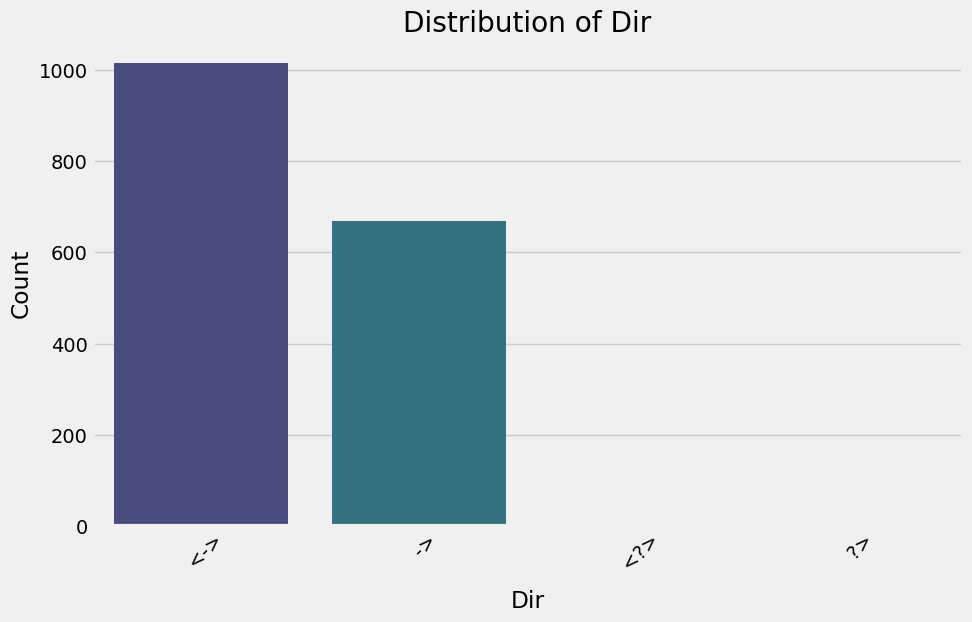

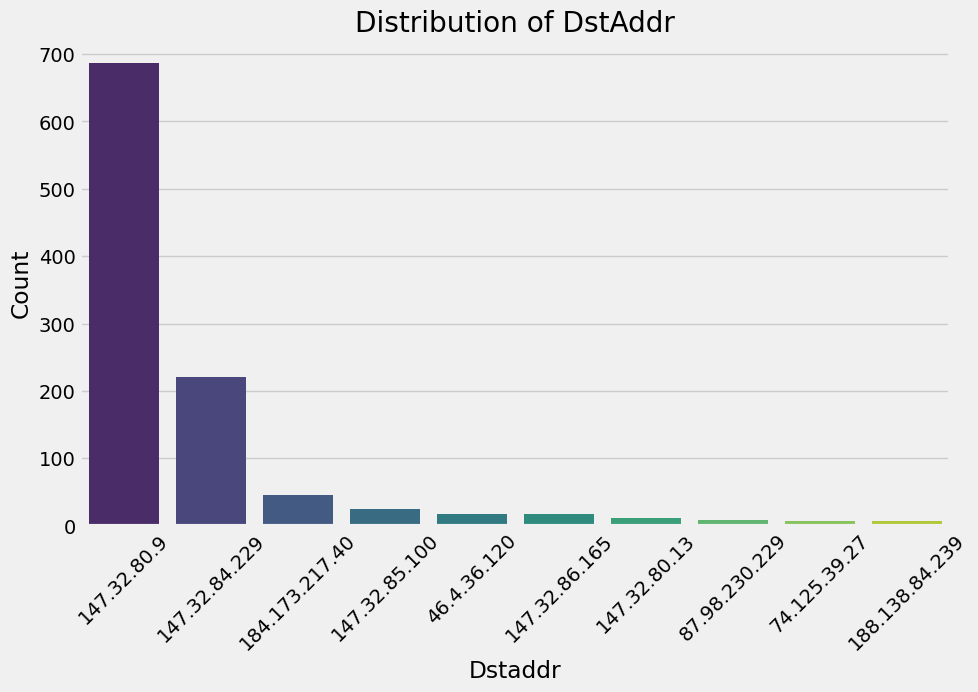

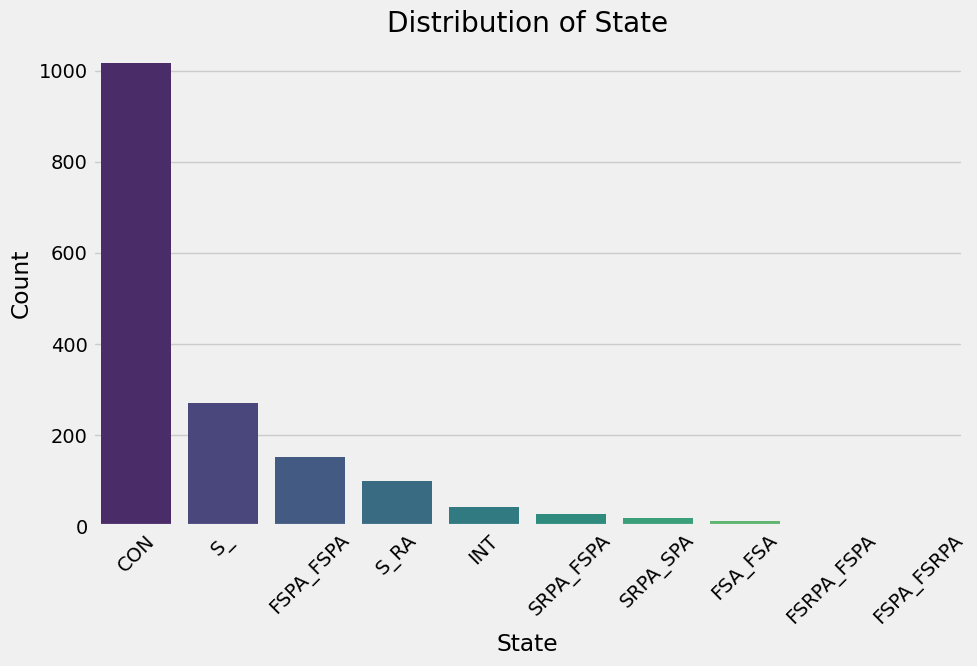

In [29]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']

# Plotting each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().head(10).index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print('\n\n')

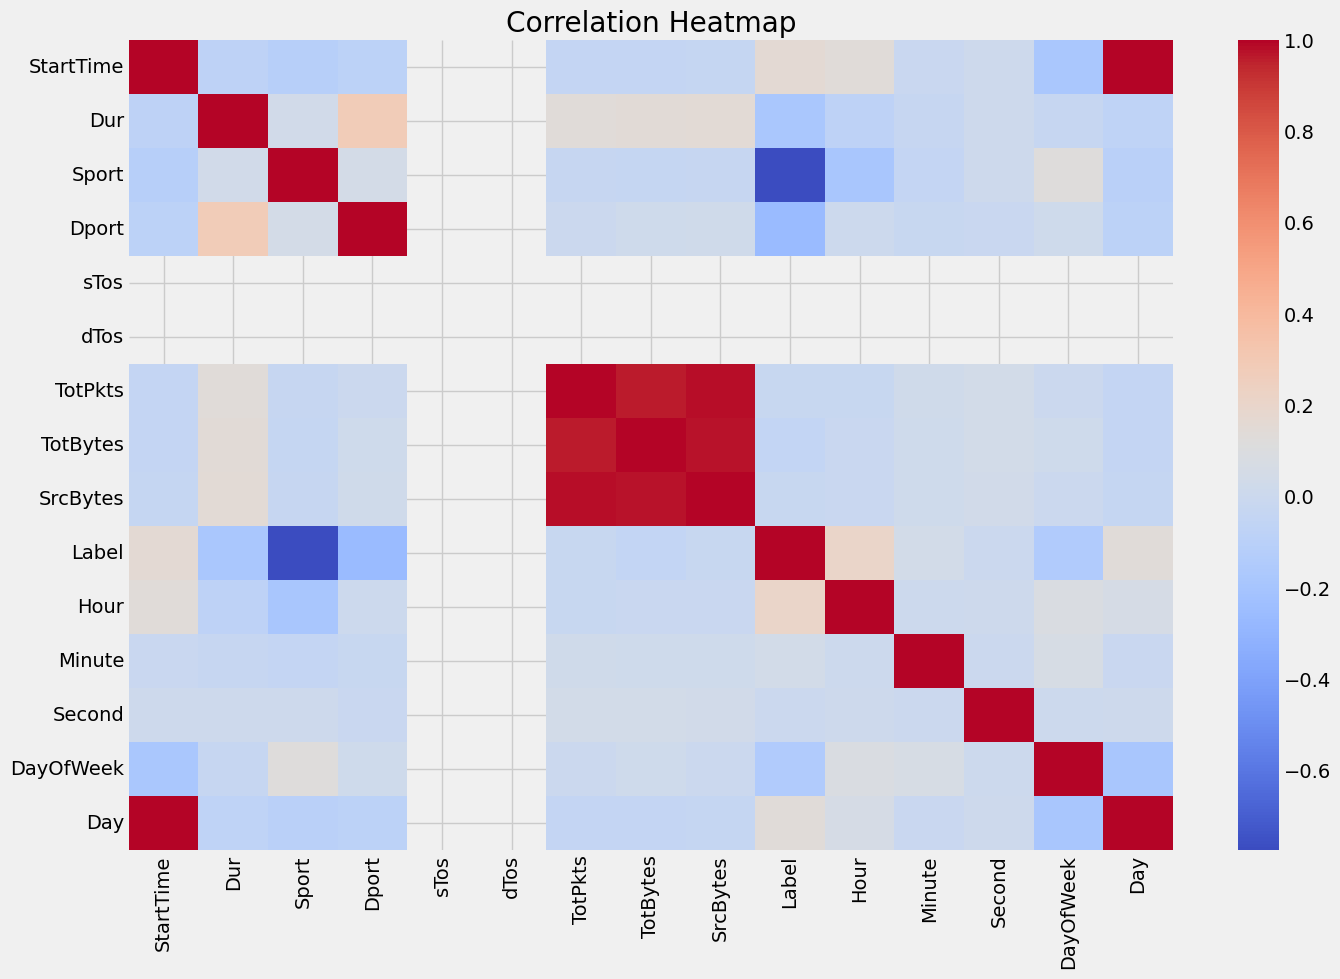

In [30]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [31]:
data[numerical_columns].corr()['Dur'].sort_values(ascending=False)

,Dur
Dur,1.000000
Dport,0.285328
SrcBytes,0.151117
TotBytes,0.143450
TotPkts,0.136263
Sport,0.032096
Second,0.013315
Minute,-0.026046
DayOfWeek,-0.026240
Day,-0.071039


In [32]:
data[numerical_columns].corr()

,StartTime,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second,DayOfWeek,Day
StartTime,1.000000,-0.076491,-0.112003,-0.085732,NaN,NaN,-0.045224,-0.040832,-0.039677,0.155135,0.140010,-0.013528,0.013578,-0.181143,0.996933
Dur,-0.076491,1.000000,0.032096,0.285328,NaN,NaN,0.136263,0.143450,0.151117,-0.183540,-0.075315,-0.026046,0.013315,-0.026240,-0.071039
Sport,-0.112003,0.032096,1.000000,0.044968,NaN,NaN,-0.027110,-0.036822,-0.029141,-0.774516,-0.186249,-0.044397,0.013998,0.121134,-0.098000
Dport,-0.085732,0.285328,0.044968,1.000000,NaN,NaN,-0.003819,0.017547,0.028245,-0.261812,0.005298,-0.022572,-0.012964,0.020640,-0.086725
sTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotPkts,-0.045224,0.136263,-0.027110,-0.003819,NaN,NaN,1.000000,0.962934,0.984395,-0.024184,-0.019925,0.025687,0.041974,0.000269,-0.044130
TotBytes,-0.040832,0.143450,-0.036822,0.017547,NaN,NaN,0.962934,1.000000,0.976353,-0.046762,-0.012973,0.017191,0.037135,0.017632,-0.040213
SrcBytes,-0.039677,0.151117,-0.029141,0.028245,NaN,NaN,0.984395,0.976353,1.000000,-0.022879,-0.014642,0.022005,0.033779,-0.004737,-0.038939
Label,0.155135,-0.183540,-0.774516,-0.261812,NaN,NaN,-0.024184,-0.046762,-0.022879,1.000000,0.208341,0.038856,-0.001108,-0.146526,0.139755


In [33]:
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
constant_columns

['sTos', 'dTos']

In [34]:
data[constant_columns[0]].value_counts()

,count
sTos,
0.0,1687


In [35]:
data = data.drop(columns=constant_columns)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second,DayOfWeek,Day
0,2011-08-14 21:21:43.883581,0.000307,udp,147.32.85.34,54995,<->,147.32.80.9,53,CON,2,321,84,0,21,21,43,6,14
1,2011-08-10 13:03:49.121246,2677.963623,udp,95.43.27.250,44020,<->,147.32.84.229,13363,CON,4,268,148,0,13,3,49,2,10
2,2011-08-15 18:45:23.896693,0.000372,udp,147.32.85.69,33371,<->,147.32.80.9,53,CON,2,218,74,0,18,45,23,0,15
3,2011-08-13 03:19:37.879287,0.000145,udp,147.32.84.138,60212,<->,147.32.80.9,53,CON,2,214,81,0,3,19,37,5,13
4,2011-08-15 20:03:31.821902,1.025449,udp,78.106.76.183,25725,<->,147.32.84.229,13363,CON,4,1048,928,0,20,3,31,0,15


In [36]:
# Calculate the correlation matrix
corr_matrix = data[numerical_columns].corr().abs()

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
threshold = 0.8
high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]
high_corr_features

['TotBytes', 'SrcBytes', 'Day']

In [37]:
data = data.drop(columns=high_corr_features)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Hour,Minute,Second,DayOfWeek
0,2011-08-14 21:21:43.883581,0.000307,udp,147.32.85.34,54995,<->,147.32.80.9,53,CON,2,0,21,21,43,6
1,2011-08-10 13:03:49.121246,2677.963623,udp,95.43.27.250,44020,<->,147.32.84.229,13363,CON,4,0,13,3,49,2
2,2011-08-15 18:45:23.896693,0.000372,udp,147.32.85.69,33371,<->,147.32.80.9,53,CON,2,0,18,45,23,0
3,2011-08-13 03:19:37.879287,0.000145,udp,147.32.84.138,60212,<->,147.32.80.9,53,CON,2,0,3,19,37,5
4,2011-08-15 20:03:31.821902,1.025449,udp,78.106.76.183,25725,<->,147.32.84.229,13363,CON,4,0,20,3,31,0


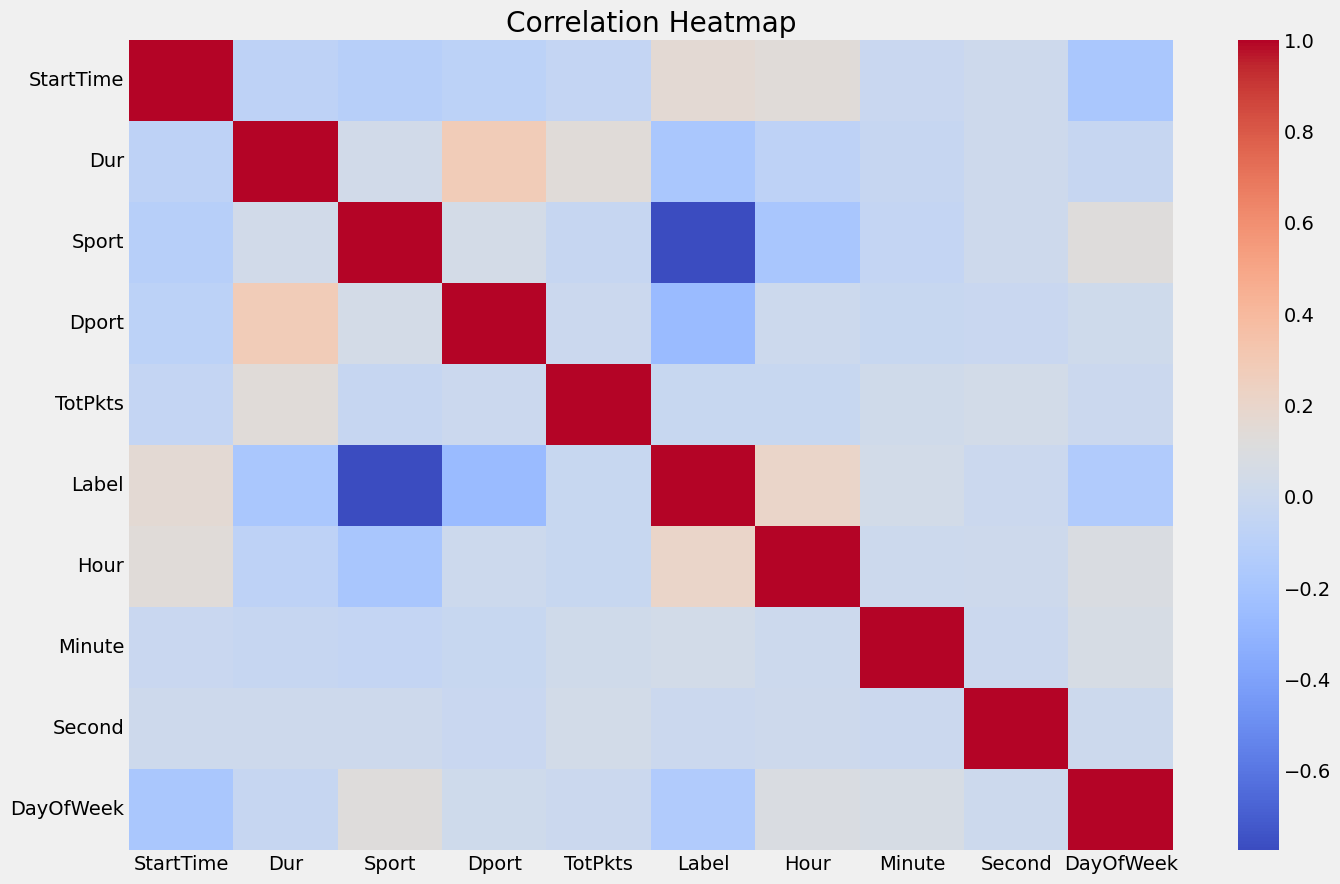

In [38]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Hour,Minute,Second,DayOfWeek
0,2011-08-14 21:21:43.883581,0.000307,udp,147.32.85.34,54995,<->,147.32.80.9,53,CON,2,0,21,21,43,6
1,2011-08-10 13:03:49.121246,2677.963623,udp,95.43.27.250,44020,<->,147.32.84.229,13363,CON,4,0,13,3,49,2
2,2011-08-15 18:45:23.896693,0.000372,udp,147.32.85.69,33371,<->,147.32.80.9,53,CON,2,0,18,45,23,0
3,2011-08-13 03:19:37.879287,0.000145,udp,147.32.84.138,60212,<->,147.32.80.9,53,CON,2,0,3,19,37,5
4,2011-08-15 20:03:31.821902,1.025449,udp,78.106.76.183,25725,<->,147.32.84.229,13363,CON,4,0,20,3,31,0


In [40]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'TotPkts', 'Label', 'Hour', 'Minute', 'Second',
       'DayOfWeek'],
      dtype='object')

In [41]:
# Convert Source and Destination IP addresses to numerical values using hashing
data['SrcAddr'] = data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
data['DstAddr'] = data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
data['SrcAddr'] = data['SrcAddr'].fillna(-1).astype(int)
data['DstAddr'] = data['DstAddr'].fillna(-1).astype(int)

In [42]:
data.dtypes

,0
StartTime,datetime64[ns]
Dur,float64
Proto,object
SrcAddr,int64
Sport,int64
Dir,object
DstAddr,int64
Dport,int64
State,object
TotPkts,int64


In [43]:
data = data.drop(columns=['StartTime'])
data = data.drop(columns=['SrcAddr','Sport'])

In [44]:
X = data.drop(columns=['Label'])
y = data[['Label']]

In [45]:
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Hour,Minute,Second,DayOfWeek
0,0.000307,udp,<->,13390,53,CON,2,21,21,43,6
1,2677.963623,udp,<->,53509,13363,CON,4,13,3,49,2
2,0.000372,udp,<->,13390,53,CON,2,18,45,23,0
3,0.000145,udp,<->,13390,53,CON,2,3,19,37,5
4,1.025449,udp,<->,53509,13363,CON,4,20,3,31,0


In [46]:
categorical_cols = ['Proto', 'State', 'Dir']

In [47]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
X[categorical_cols] = le.fit_transform(X[categorical_cols])
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Hour,Minute,Second,DayOfWeek
0,0.000307,2.0,2.0,13390,53,0.0,2,21,21,43,6
1,2677.963623,2.0,2.0,53509,13363,0.0,4,13,3,49,2
2,0.000372,2.0,2.0,13390,53,0.0,2,18,45,23,0
3,0.000145,2.0,2.0,13390,53,0.0,2,3,19,37,5
4,1.025449,2.0,2.0,53509,13363,0.0,4,20,3,31,0


In [48]:
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [50]:
X_train.shape,X_test.shape

((1349, 11), (338, 11))

In [51]:
y_train.shape,y_test.shape

((1349, 1), (338, 1))

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
X_train.shape,X_test.shape

((1349, 11), (338, 11))

In [54]:
label = y_test['Label'].unique().tolist()
label

[0, 1]

In [55]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.values.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 1.6904263496398926
Prediction time (sec) = 0.0005118846893310547

Training score = 0.7990432881740163
Testing score = 0.8254079254079254

No of misclassified for class 0 (test data) = 34
No of misclassified for class 1 (test data) = 25
Total no of misclassified points (test data) = 59
Total % of misclassified points (test data) = 0.17455621301775148

Training log_loss = 0.49584127150020824
Testing log_loss = 0.4834222870373713

Confusion matrix:


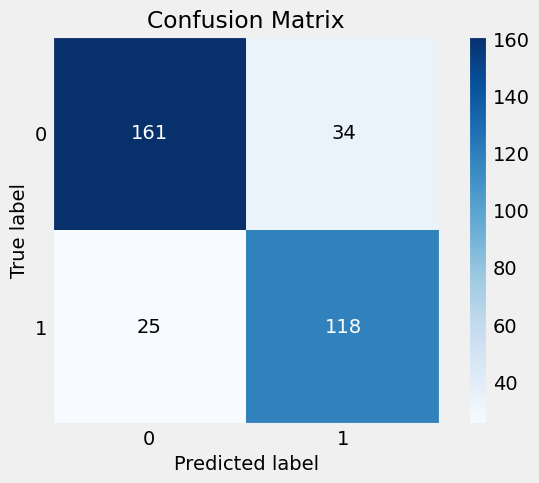

Classification report:

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       195
           1       0.78      0.83      0.80       143

    accuracy                           0.83       338
   macro avg       0.82      0.83      0.82       338
weighted avg       0.83      0.83      0.83       338

**************************************************************************


In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.005434989929199219
Prediction time (sec) = 0.0002837181091308594

Training score = 0.7918342149295623
Testing score = 0.8149184149184149

No of misclassified for class 0 (test data) = 34
No of misclassified for class 1 (test data) = 28
Total no of misclassified points (test data) = 62
Total % of misclassified points (test data) = 0.1834319526627219

Confusion matrix:


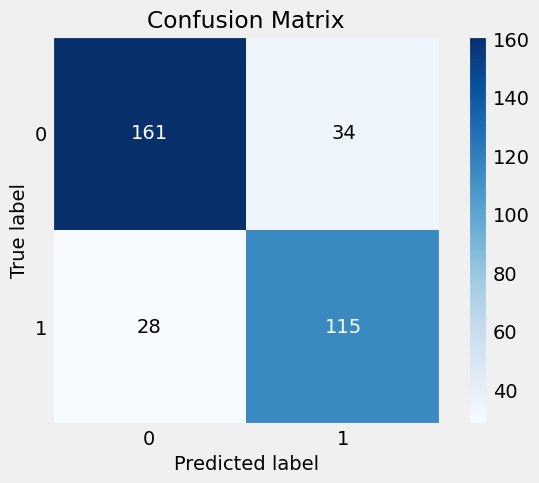

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       195
           1       0.77      0.80      0.79       143

    accuracy                           0.82       338
   macro avg       0.81      0.81      0.81       338
weighted avg       0.82      0.82      0.82       338

**************************************************************************


In [57]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.007723808288574219
Prediction time (sec) = 0.0004017353057861328

Training score = 1.0
Testing score = 0.9123543123543123

No of misclassified for class 0 (test data) = 11
No of misclassified for class 1 (test data) = 17
Total no of misclassified points (test data) = 28
Total % of misclassified points (test data) = 0.08284023668639054

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 2.9858647777966874

Confusion matrix:


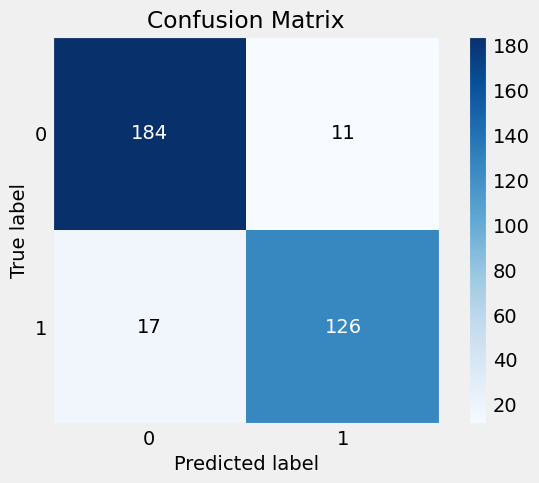

Classification report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       195
           1       0.92      0.88      0.90       143

    accuracy                           0.92       338
   macro avg       0.92      0.91      0.91       338
weighted avg       0.92      0.92      0.92       338

**************************************************************************


In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.18348145484924316
Prediction time (sec) = 0.01116037368774414

Training score = 1.0
Testing score = 0.941958041958042

No of misclassified for class 0 (test data) = 9
No of misclassified for class 1 (test data) = 10
Total no of misclassified points (test data) = 19
Total % of misclassified points (test data) = 0.05621301775147929

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 0.1647453019605524

Confusion matrix:


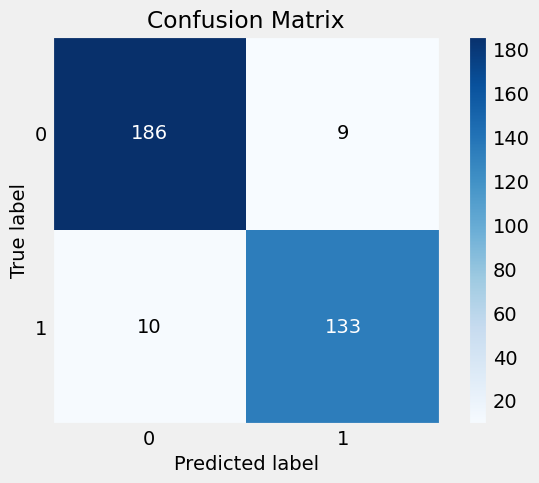

Classification report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       195
           1       0.94      0.93      0.93       143

    accuracy                           0.94       338
   macro avg       0.94      0.94      0.94       338
weighted avg       0.94      0.94      0.94       338

**************************************************************************


In [59]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.23726248741149902
Prediction time (sec) = 0.009722471237182617

Training score = 1.0
Testing score = 0.9461538461538461

No of misclassified for class 0 (test data) = 6
No of misclassified for class 1 (test data) = 11
Total no of misclassified points (test data) = 17
Total % of misclassified points (test data) = 0.05029585798816568

Training log_loss = 0.04735995710001666
Testing log_loss = 0.14495946115141617

Confusion matrix:


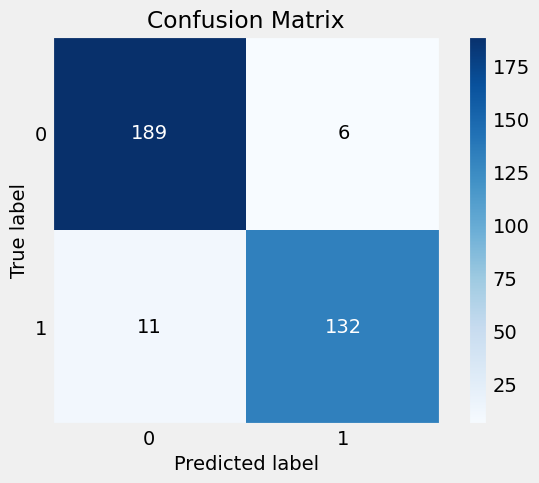

Classification report:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       195
           1       0.96      0.92      0.94       143

    accuracy                           0.95       338
   macro avg       0.95      0.95      0.95       338
weighted avg       0.95      0.95      0.95       338

**************************************************************************


In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [61]:
# Set up directories for TensorBoard logs and model checkpoints
import os
from datetime import datetime
import tensorflow as tf

# Directory for TensorBoard logs
log_dir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))

# Directory to save the best model
checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Convert y_train and y_test to numpy arrays
y_train = y_train.values
y_test = y_test.values

# One-hot encode the labels if not already
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

# Define the input shape based on X_train
input_shape = X_train.shape[1]

# Functional API to define the model
inputs = Input(shape=(input_shape,))
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(2, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,914 (11.38 KB)

 Trainable params: 2,914 (11.38 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Define callbacks
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'best_model.keras'),
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [64]:
# Start timer for training
start_train_time = time.time()
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[checkpoint_callback, tensorboard_callback]
)
# End timer for training
end_train_time = time.time()
train_time = end_train_time - start_train_time

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4550 - loss: 0.8571 - precision: 0.4550 - recall: 0.4550
Epoch 1: val_loss improved from inf to 0.60494, saving model to checkpoints/best_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - accuracy: 0.4567 - loss: 0.8541 - precision: 0.4567 - recall: 0.4567 - val_accuracy: 0.7074 - val_loss: 0.6049 - val_precision: 0.7074 - val_recall: 0.7074
Epoch 2/50
18/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6074 - loss: 0.6426 - precision: 0.6074 - recall: 0.6074 
Epoch 2: val_loss improved from 0.60494 to 0.52166, saving model to checkpoints/best_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6272 - loss: 0.6314 - precision: 0.6272 - recall: 0.6272 - val_accuracy: 0.7593 - val_loss: 0.5217 - val_precision: 0.7593 - val_recall: 0.7593
Epoch 3/50
31/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6905 - loss: 0.5699 - precision: 0.6905 - recall: 0.6905
Epoch 3: val_loss improved from 0.52166 to 0.4848

In [65]:
model = tf.keras.models.load_model('checkpoints/best_model.keras')

In [66]:
y_pred_train = model.predict(X_train)

start_train_time = time.time()
y_pred_test = model.predict(X_test)
end_train_time = time.time()
test_time = end_train_time - start_train_time

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [67]:
y_pred_prob_train = np.max(y_pred_train,axis=1)
y_pred_train = np.argmax(y_pred_train,axis=1)

y_pred_prob_test = np.max(y_pred_test,axis=1)
y_pred_test = np.argmax(y_pred_test,axis=1)

y_train = np.argmax(y_train,axis=1)
y_test = np.argmax(y_test,axis=1)


Training score = 0.8808473219265577
Testing score = 0.8794871794871795

No of misclassified for class 0 (test data) = 17
No of misclassified for class 1 (test data) = 22
Total no of misclassified points (test data) = 39
Total % of misclassified points (test data) = 0.11538461538461539

Training log_loss = 2.195700067656712
Testing log_loss = 2.3899350662836745

Confusion matrix:


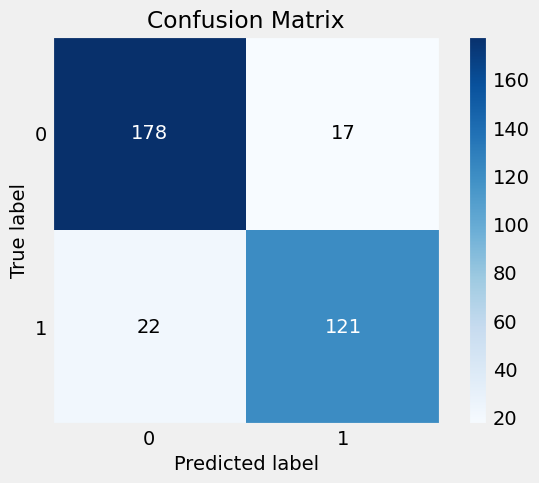

Classification report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       195
           1       0.88      0.85      0.86       143

    accuracy                           0.88       338
   macro avg       0.88      0.88      0.88       338
weighted avg       0.88      0.88      0.88       338

**************************************************************************


In [68]:
confusion_mat = confusion_matrix(y_test, y_pred_test)
misclassified = np.sum(y_pred_test != y_test)
acc_train = balanced_accuracy_score(y_train, y_pred_train)
acc_test = balanced_accuracy_score(y_test, y_pred_test)

loss_train = log_loss(y_train, y_pred_prob_train)
loss_test = log_loss(y_test, y_pred_prob_test)

print(f'\nTraining score = {acc_train}')
print(f'Testing score = {acc_test}\n')

for i, class_label in enumerate(label):
    err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
    print(f'No of misclassified for class {class_label} (test data) = {err}')

print(f'Total no of misclassified points (test data) = {misclassified}')
print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

if loss_train is not None and loss_test is not None:
    print(f'Training log_loss = {loss_train}')
    print(f'Testing log_loss = {loss_test}\n')

print('Confusion matrix:')
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
plt.show()

print('Classification report:\n')
print(classification_report(y_test, y_pred_test))
print('**************************************************************************')

In [69]:
ANN_results = [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

In [70]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results,ANN_results]
s2=['LR','LSVC','DTC','ETC','RFC','ANN']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.799043,0.825408,59,0.174556,4.958413e-01,0.483422,1.690426,0.000512
1,LSVC,0.791834,0.814918,62,0.183432,NaN,NaN,0.005435,0.000284
2,DTC,1.000000,0.912354,28,0.082840,2.220446e-16,2.985865,0.007724,0.000402
3,ETC,1.000000,0.941958,19,0.056213,2.220446e-16,0.164745,0.183481,0.011160
4,RFC,1.000000,0.946154,17,0.050296,4.735996e-02,0.144959,0.237262,0.009722
5,ANN,0.880847,0.879487,39,0.115385,2.195700e+00,2.389935,22.426899,0.558116


In [71]:
scaler

StandardScaler()

In [72]:
dtc

DecisionTreeClassifier(class_weight='balanced')

In [73]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(scaler, dtc)
joblib.dump(pipeline, 'dtc_pipeline.joblib')

['dtc_pipeline.joblib']

In [74]:
# Assuming rf_model is your trained Random Forest model
importances = etc.feature_importances_

# Assuming your feature names are stored in a list `feature_names`
feature_names = X.columns  # Or a list of feature names if you have them separately

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
10,DayOfWeek,0.199669
7,Hour,0.177273
5,State,0.137604
4,Dport,0.107166
0,Dur,0.092268
3,DstAddr,0.069813
8,Minute,0.050723
9,Second,0.050622
6,TotPkts,0.049312
1,Proto,0.036813


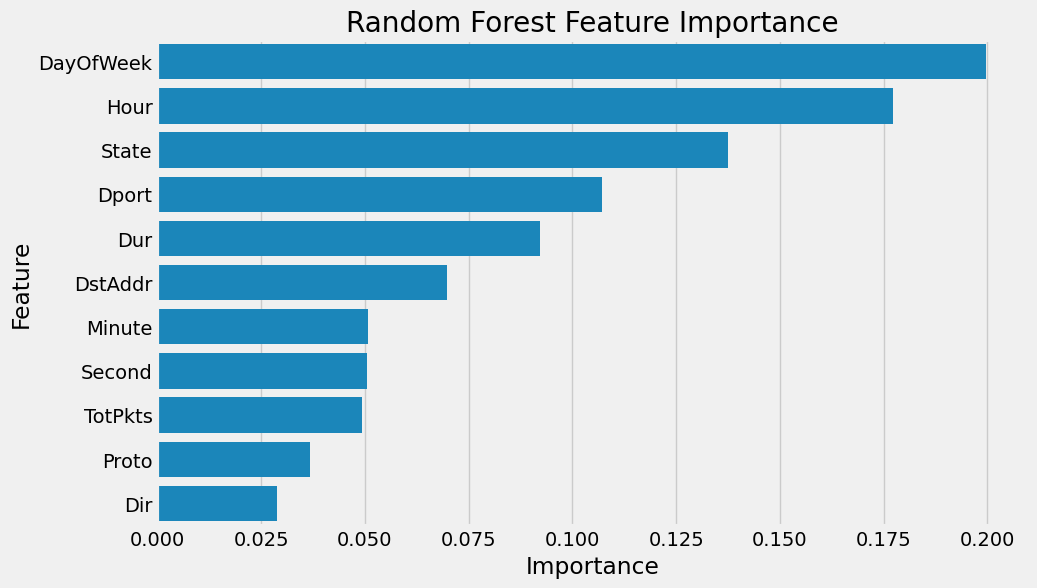

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

In [76]:
from sklearn.feature_selection import RFE

selector = RFE(etc, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

In [77]:
# Create a DataFrame for better visualization
feature_importance2_df = pd.DataFrame({
    'Feature': feature_names,
    'support': selector.support_,
    'ranking':selector.ranking_
})

feature_importance2_df = feature_importance2_df.sort_values(by='ranking')
feature_importance2_df

,Feature,support,ranking
0,Dur,True,1
7,Hour,True,1
5,State,True,1
4,Dport,True,1
10,DayOfWeek,True,1
3,DstAddr,False,2
8,Minute,False,3
9,Second,False,4
1,Proto,False,5
6,TotPkts,False,6
